<a href="https://colab.research.google.com/github/gullyboy007/machine-learning-journey/blob/master/stock_prediction_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [65]:
#Get the stock quote 
df = web.DataReader('MSFT', data_source='yahoo', start='2012-01-01', end='2019-12-17') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.959635
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.476425
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.706108
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.058842
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.755325
...,...,...,...,...,...,...
2019-12-11,151.869995,150.330002,151.539993,151.699997,18856600.0,150.866592
2019-12-12,153.440002,151.020004,151.649994,153.240005,24612100.0,152.398148
2019-12-13,154.889999,152.830002,153.000000,154.529999,23845400.0,153.681061


In [66]:
df.shape

(2003, 6)

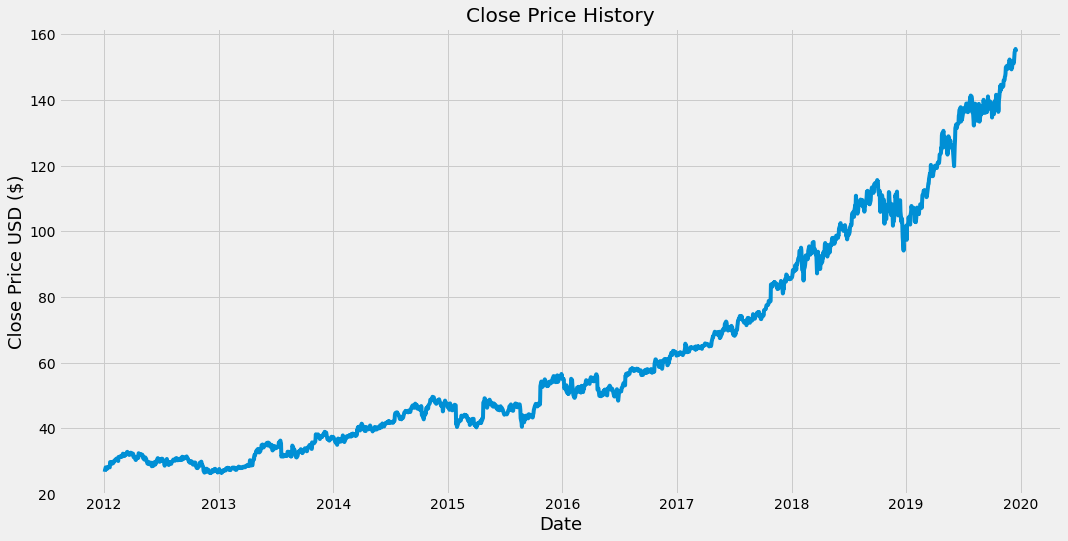

In [67]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [0]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [0]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
#Train the model
model.fit(x_train, y_train, batch_size=5, epochs=5)

Epoch 1/5
1543/1543 [==============================] - 17s 11ms/step - loss: 6.7758e-04
Epoch 2/5
1543/1543 [==============================] - 16s 11ms/step - loss: 1.7579e-04
Epoch 3/5
1543/1543 [==============================] - 16s 10ms/step - loss: 2.1093e-04
Epoch 4/5
1543/1543 [==============================] - 16s 10ms/step - loss: 1.5495e-04
Epoch 5/5
1543/1543 [==============================] - 16s 10ms/step - loss: 1.1882e-04


In [0]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [0]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


In [0]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [80]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.527061281996088

In [111]:
moving_average = data[1600:].rolling(window=5).mean()

moving_average


,Close
Date,
2018-05-14,NaN
2018-05-15,NaN
2018-05-16,NaN
2018-05-17,NaN
2018-05-18,97.008000
...,...
2019-12-11,151.173999
2019-12-12,151.836002
2019-12-13,152.392001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


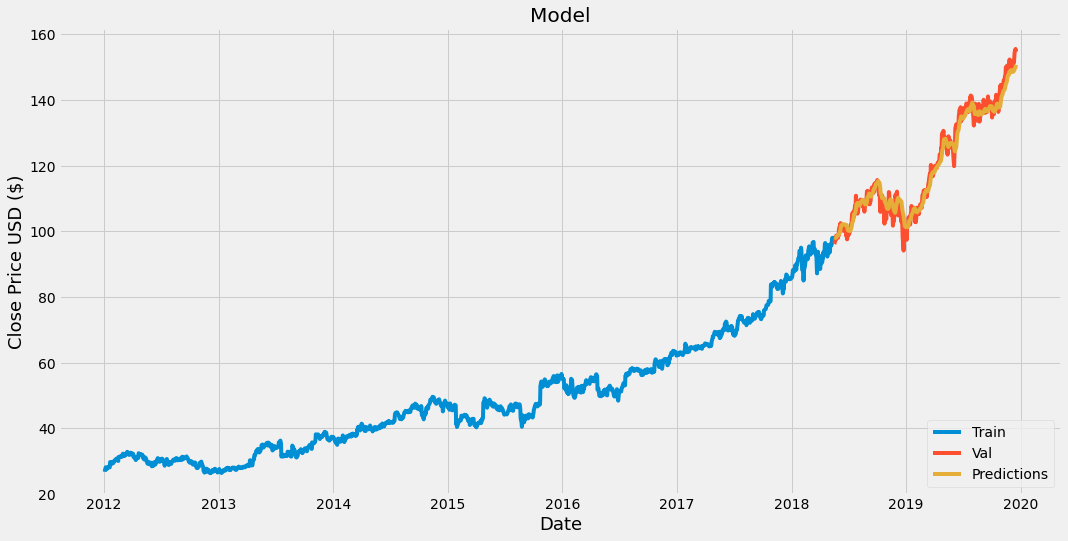

In [87]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])

plt.plot(valid[['Close', 'Predictions',]])
plt.legend(['Train', 'Val', 'Predictions',], loc='lower right')

plt.savefig('graph1.png')
plt.show()

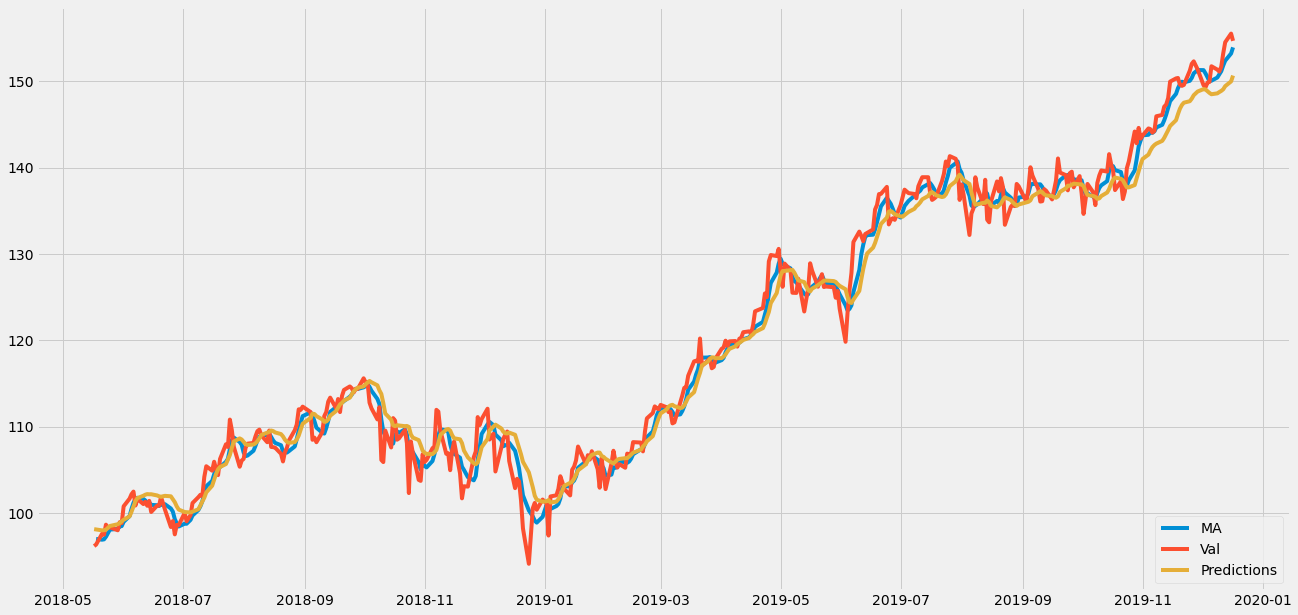

In [112]:
plt.figure(figsize=(20,10))
plt.plot(moving_average['Close'])
plt.plot(valid[['Close', 'Predictions',]])
plt.legend(['MA', 'Val', 'Predictions',], loc='lower right')
plt.show()

In [0]:
#Show the valid and predicted prices
valid

In [55]:
#Get the quote
apple_quote = web.DataReader('MSFT', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[240.41829]]


In [0]:
#Get the quote
apple_quote2 = web.DataReader('MSFT', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    279.73999
Name: Close, dtype: float64
